In [203]:
from __future__ import print_function

import tensorflow as tf
import numpy

In [204]:
tf.reset_default_graph()

# Constant define

In [188]:
EPOCHES = 100
DISPLAY_STEP = 10
learning_rate = 0.01

# Generate dataset

In [205]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [190]:
print(X_data.shape)
print(y_data.shape)
print(type(X_data))
print(type(y_data))

(17,)
(17,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [191]:
print(X_data.shape)
print(y_data.shape)
print(type(X_data))
print(type(y_data))

(17,)
(17,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Construct Network

In [206]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Start training

In [ ]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= 0.091807432 W= 0.3178042 b= 0.31076446
Epoch: 0100 cost= 0.090091750 W= 0.31374744 b= 0.33994812
Epoch: 0150 cost= 0.088574395 W= 0.30993187 b= 0.36739695
Epoch: 0200 cost= 0.087232433 W= 0.3063432 b= 0.39321336
Epoch: 0250 cost= 0.086045690 W= 0.30296806 b= 0.4174941
Epoch: 0300 cost= 0.084996186 W= 0.29979366 b= 0.4403306
Epoch: 0350 cost= 0.084068060 W= 0.296808 b= 0.46180943
Epoch: 0400 cost= 0.083247282 W= 0.294 b= 0.48201078
Epoch: 0450 cost= 0.082521528 W= 0.2913589 b= 0.5010098
Epoch: 0500 cost= 0.081879720 W= 0.28887498 b= 0.5188792
Epoch: 0550 cost= 0.081312194 W= 0.28653872 b= 0.5356862
Epoch: 0600 cost= 0.080810383 W= 0.28434134 b= 0.5514933
Epoch: 0650 cost= 0.080366626 W= 0.28227466 b= 0.56636107
Epoch: 0700 cost= 0.079974249 W= 0.2803309 b= 0.58034474
Epoch: 0750 cost= 0.079627357 W= 0.27850273 b= 0.59349626
Epoch: 0800 cost= 0.079320610 W= 0.27678314 b= 0.60586673
Epoch: 0850 cost= 0.079049431 W= 0.275166 b= 0.61750036
Epoch: 0900 cost= 0.078809701 W= 

Epoch: 0050 cost= 0.222854272 W= 0.46311286 b= -0.734576
Epoch: 0100 cost= 0.206002146 W= 0.45041397 b= -0.64322096
Epoch: 0150 cost= 0.191095784 W= 0.43847013 b= -0.55729806
Epoch: 0200 cost= 0.177910939 W= 0.42723677 b= -0.47648603
Epoch: 0250 cost= 0.166248694 W= 0.4166715 b= -0.40048012
Epoch: 0300 cost= 0.155933246 W= 0.4067346 b= -0.32899454
Epoch: 0350 cost= 0.146809235 W= 0.39738867 b= -0.26176068
Epoch: 0400 cost= 0.138738990 W= 0.38859862 b= -0.19852552
Epoch: 0450 cost= 0.131600887 W= 0.38033134 b= -0.13905129
Epoch: 0500 cost= 0.125287309 W= 0.37255567 b= -0.08311434
Epoch: 0550 cost= 0.119703025 W= 0.36524257 b= -0.030504063
Epoch: 0600 cost= 0.114763848 W= 0.3583644 b= 0.018977175
Epoch: 0650 cost= 0.110395290 W= 0.35189524 b= 0.06551555
Epoch: 0700 cost= 0.106531471 W= 0.34581095 b= 0.109286
Epoch: 0750 cost= 0.103114069 W= 0.3400884 b= 0.15045318
Epoch: 0800 cost= 0.100091577 W= 0.3347063 b= 0.18917203
Epoch: 0850 cost= 0.097418360 W= 0.32964423 b= 0.2255881
Epoch: 0900

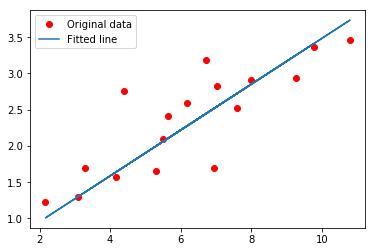

Testing... (Mean square loss Comparison)
Testing cost= 0.081627384
Absolute mean square loss difference: 0.009486333


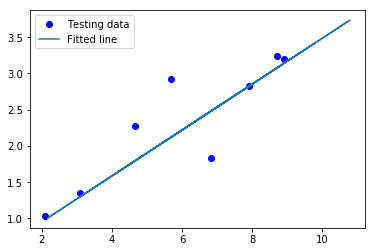

In [177]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()